<a href="https://colab.research.google.com/github/R-Owino/ELECTRIC-CAR-USAGE-ANALYSIS-II/blob/hypothesis-tests/Moringa_Data_Science_Core_W4_Independent_Project_2022_03_Rehema_Owino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Defining the question 


### i. Specifying the question 

Investigate a claim about bluecars by identifying some areas and periods of interest via sampling.

### ii. Setting the hypotheses
Hypothesis: The average number of bluecars taken from postal code 75015 is greater than that from postal code 75017.
- Null hypothesis:The average number of bluecars taken from postal code 75015 is the same as in postal code 75017 during weekdays.
- Alternative hypothesis: The average number of bluecars taken from postal code 75015 is not the same as in postal code 75017 during weekdays.

### iii. Defining the metric for success 
This study will be considered a success if we fail to reject the null hypothesis. 

### iv. Understanding the context 
In this problem, we are proving our claim that during weeknds, bluecars do not get picked in area 75017 as much as in area 75015.

### v. Experimental design 
- Load and read the dataset.
- Perform data wrangling on the dataset. 
- Do exploratory data analysis analysis of the bluecars only.
- Perform hypothesis testing.

### vi. Data relevance
The data provided to carry out this study is relevant to the course of study.

# 2. Find and deal with outliers, anomalies, and missing data within the dataset.

In [139]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats

print('All libraries are imported')

All libraries are imported


### Loading and previewing the datasets

In [2]:
# description of the autolib dataset 
description = pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')
description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [46]:
# autolib dataset
df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset') 
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [47]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


### Accessing information about our dataset

In [48]:
# Getting to know more about our dataset by accessing its information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [49]:
# Determining the no. of records in our dataset

print('Rows are ' + str(df.shape[0]) + ' and columns are ' + str(df.shape[1]))

Rows are 16085 and columns are 13


### Tidying our dataset 

In [50]:
# Renaming the columns
# replacing spaces with _ so that the column names with spaces are one worded and in lower case

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

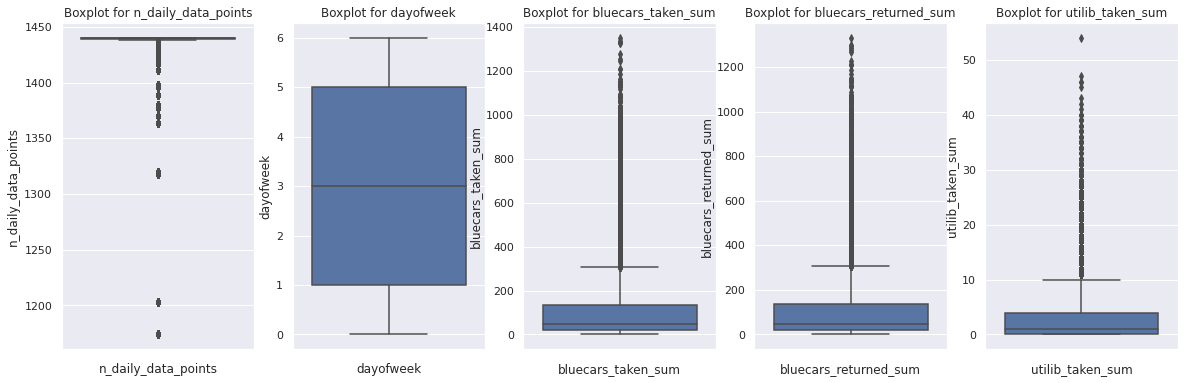

In [51]:
# Checking for outliers

columns = ['n_daily_data_points', 'dayofweek', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum']
fig, ax = plt.subplots(ncols = len(columns), figsize = (20, 6))

for i, column in enumerate(columns):
  sns.boxplot(y = df[column], ax = ax[i])
  ax[i].set_title('Boxplot for {}'.format(column))
  ax[i].set_xlabel(column)

plt.show()

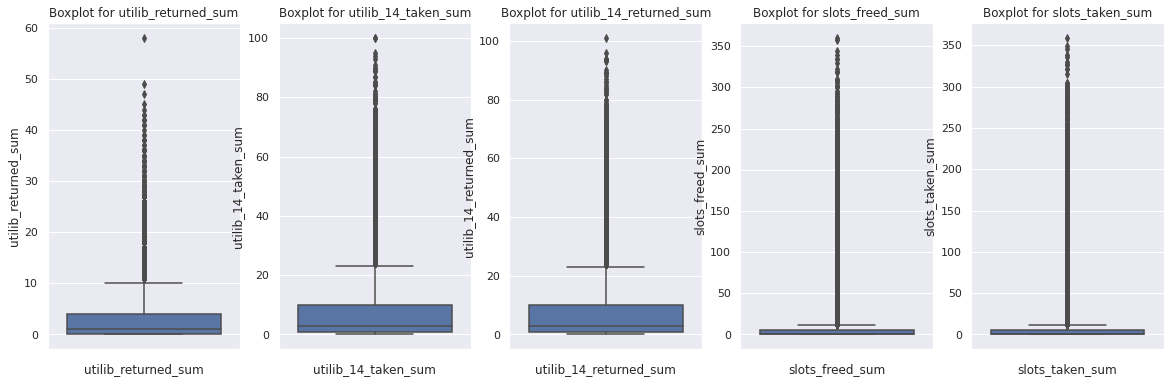

In [52]:
columns = ['utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum']
fig, ax = plt.subplots(ncols = len(columns), figsize = (20, 6))

for i, column in enumerate(columns):
  sns.boxplot(y = df[column], ax = ax[i])
  ax[i].set_title('Boxplot for {}'.format(column))
  ax[i].set_xlabel(column)

plt.show()



In [53]:
# Sum of outliers per column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

out_sum = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
out_sum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


bluecars_returned_sum     2213
bluecars_taken_sum        2215
date                         0
day_type                     0
dayofweek                    0
n_daily_data_points       2670
postal_code               3899
slots_freed_sum           3235
slots_taken_sum           3234
utilib_14_returned_sum    1820
utilib_14_taken_sum       1815
utilib_returned_sum       1770
utilib_taken_sum          1783
dtype: int64

The outliers are a lot just from the visuals, but could impact the result of the analysis if removed suppose they are viable.

In [26]:
# Checking for duplicates 
df.duplicated().any()

False

In [27]:
# Checking for missing values 
df.isnull().any()

postal_code               False
date                      False
n_daily_data_points       False
dayofweek                 False
day_type                  False
bluecars_taken_sum        False
bluecars_returned_sum     False
utilib_taken_sum          False
utilib_returned_sum       False
utilib_14_taken_sum       False
utilib_14_returned_sum    False
slots_freed_sum           False
slots_taken_sum           False
dtype: bool

In [28]:
# Descriptive analysis of the numerical columns 
df.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [54]:
# dropping unnecessary columns
autolib = df.drop(['utilib_14_returned_sum', 'utilib_14_taken_sum', 'utilib_returned_sum', 'utilib_taken_sum', 'dayofweek'], axis=1)
autolib.head()

,postal_code,date,n_daily_data_points,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,weekday,110,103,22,20
1,75001,1/2/2018,1438,weekday,98,94,23,22
2,75001,1/3/2018,1439,weekday,138,139,27,27
3,75001,1/4/2018,1320,weekday,104,104,25,21
4,75001,1/5/2018,1440,weekday,114,117,18,20


In [56]:
# changing the date column data type to datetime
autolib['date']= pd.to_datetime(autolib['date'])
autolib.head()

,postal_code,date,n_daily_data_points,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,weekday,110,103,22,20
1,75001,2018-01-02,1438,weekday,98,94,23,22
2,75001,2018-01-03,1439,weekday,138,139,27,27
3,75001,2018-01-04,1320,weekday,104,104,25,21
4,75001,2018-01-05,1440,weekday,114,117,18,20


In [61]:
# splitting the date column to month, year and date 
autolib['day'] = autolib['date'].dt.day
autolib['month'] = autolib['date'].dt.month
autolib['year'] = autolib['date'].dt.year
autolib.head()

,postal_code,date,n_daily_data_points,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,day,month,year
0,75001,2018-01-01,1440,weekday,110,103,22,20,1,1,2018
1,75001,2018-01-02,1438,weekday,98,94,23,22,2,1,2018
2,75001,2018-01-03,1439,weekday,138,139,27,27,3,1,2018
3,75001,2018-01-04,1320,weekday,104,104,25,21,4,1,2018
4,75001,2018-01-05,1440,weekday,114,117,18,20,5,1,2018


In [63]:
# naming the months
autolib.month.unique()

def month(month):
  if month==1:
    return 'Jan'
  elif month==2:
    return 'Feb'
  elif month==3:
    return 'March'
  elif month == 4:
    return 'April'
  elif month == 5:
    return 'May'
  elif month==6:
    return "June"
autolib['date_month']=autolib['month'].apply(month)

autolib.head()

,postal_code,date,n_daily_data_points,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,day,month,year,date_month
0,75001,2018-01-01,1440,weekday,110,103,22,20,1,1,2018,Jan
1,75001,2018-01-02,1438,weekday,98,94,23,22,2,1,2018,Jan
2,75001,2018-01-03,1439,weekday,138,139,27,27,3,1,2018,Jan
3,75001,2018-01-04,1320,weekday,104,104,25,21,4,1,2018,Jan
4,75001,2018-01-05,1440,weekday,114,117,18,20,5,1,2018,Jan


In [65]:
auto = autolib.drop(['date', 'month', 'year'], axis = 1)
auto.head()

,postal_code,n_daily_data_points,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,day,date_month
0,75001,1440,weekday,110,103,22,20,1,Jan
1,75001,1438,weekday,98,94,23,22,2,Jan
2,75001,1439,weekday,138,139,27,27,3,Jan
3,75001,1320,weekday,104,104,25,21,4,Jan
4,75001,1440,weekday,114,117,18,20,5,Jan


# 3. Exploratory data analysis

### Univariate analysis 

Mean, mode and median of bluecars taken

In [66]:
print("The mean: ",auto.bluecars_taken_sum.mean())
print("The median: ",auto.bluecars_taken_sum.median())
print("The mode: ",auto.bluecars_taken_sum.mode())

The mean:  125.92695057506994
The median:  46.0
The mode:  0    12
dtype: int64


Standard deviation, variance, kurtosis and skewness of bluecars taken

In [67]:
print("The Standard Deviation: ",auto.bluecars_taken_sum.std())
print("The Variance: ",auto.bluecars_taken_sum.var())
print("The Kurtosis: ",auto.bluecars_taken_sum.kurt())
print("The Skewness: ",auto.bluecars_taken_sum.skew())

The Standard Deviation:  185.42657876727893
The Variance:  34383.01611333789
The Kurtosis:  6.172692305510042
The Skewness:  2.4063548974959086


Mean, mode and median of bluecars returned

In [68]:
print("The mean: ",auto.bluecars_returned_sum.mean())
print("The median: ",auto.bluecars_returned_sum.median())
print("The mode: ",auto.bluecars_returned_sum.mode())

The mean:  125.912713708424
The median:  46.0
The mode:  0    13
dtype: int64


Standard deviation, variance, kurtosis and skewness of bluecars returned

In [69]:
print("The Standard Deviation: ",auto.bluecars_returned_sum.std())
print("The Variance: ",auto.bluecars_returned_sum.var())
print("The Kurtosis: ",auto.bluecars_returned_sum.kurt())
print("The Skewness: ",auto.bluecars_returned_sum.skew())

The Standard Deviation:  185.50153480148427
The Variance:  34410.819413706275
The Kurtosis:  6.1862880957582345
The Skewness:  2.412084978838923


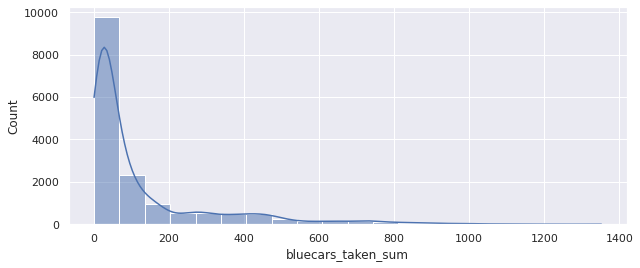

In [76]:
# Histogram for bluecars taken
sns.histplot(data=auto, x='bluecars_taken_sum', bins = 20, kde = True)
sns.set(rc={'figure.figsize':(10,6)})

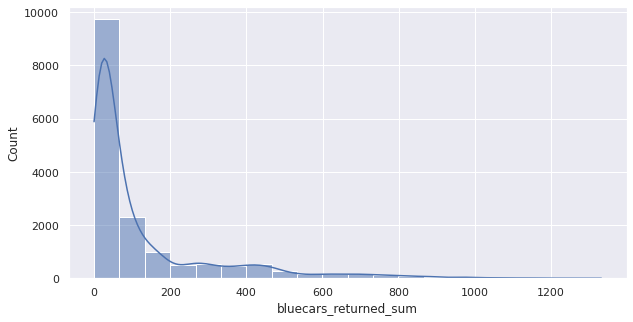

In [75]:
# Histogram for bluecars returned
sns.histplot(data=auto, x='bluecars_returned_sum', bins = 20, kde = True)
sns.set(rc={'figure.figsize':(10,4)})

Univariate analysis conclusions:
- Kurtosis for both columns show that the data is heavily tailed more than for a normal distribution.
- Both the taken and returned columns look very much alike.


### Bivariate analysis

Text(0.5, 1.0, 'Correlation matrix for the numerical columns')

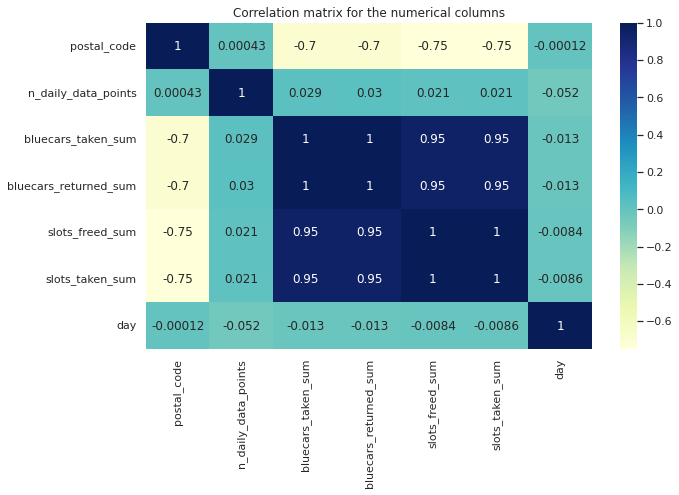

In [77]:
# Plotting a correlation matrix 
corr_ = auto.corr()
sns.heatmap(corr_, cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(15,15)})
plt.title('Correlation matrix for the numerical columns')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


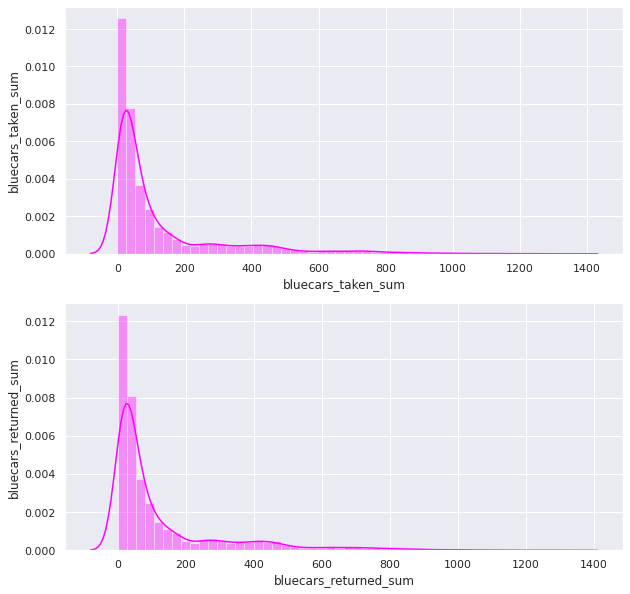

In [78]:
# the frequency distribution of the bluecars taken and bluecars returned columns 
col_names = ['bluecars_taken_sum', 'bluecars_returned_sum']

fig, ax = plt.subplots(len(col_names), figsize=(10,10))

for i, col_val in enumerate(col_names):
  sns.distplot(auto[col_val], hist=True, ax=ax[i], color='magenta')
  ax[i].set_xlabel(col_val, fontsize=12)
  ax[i].set_ylabel(col_val, fontsize=12)

plt.show()

Bivariate analysis conclusions:
- There is a high correlation between bluecars taken and bluecars returned. 
- Both columns, bluecars taken and bluecars returned are normally distributed even though they are right-skewed.

### Data sampling

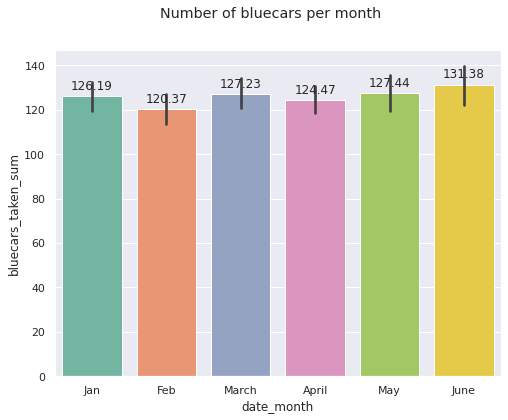

In [84]:
# The number of bluecars taken by month

fig, ax=plt.subplots(figsize=(8,6))
plt.suptitle('Number of bluecars per month')
sns.barplot(x='date_month',y='bluecars_taken_sum',palette='Set2',data=auto)
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

June had the highest number of taken bluecars.

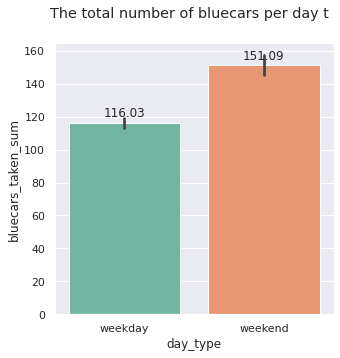

In [86]:
# The number od bluecars taken by day type (weekday or weekend)

fig, ax=plt.subplots(figsize=(5,5))
plt.suptitle('The total number of bluecars per day t')
sns.barplot(x='day_type',y='bluecars_taken_sum',palette='Set2',data = auto)
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Most bluecars were taken during weekends.

In [85]:
# The number of bluecars taken by postal code

postal_code=auto.pivot_table(values=['bluecars_taken_sum'],index=['postal_code'],aggfunc='sum').sort_values(by='bluecars_taken_sum',ascending=0)
postal_code.head(10)

,bluecars_taken_sum
postal_code,
75015,139925
75016,123287
75017,114581
75013,84489
75019,81973
75012,77572
75014,75862
75011,74939
75020,72331


The most popular postal code where bluecars were being picked was 75015.

In [107]:
# Selecting only weekdays to work with that period 
weekday = auto[auto['day_type']=='weekday']
weekday.head()

,postal_code,n_daily_data_points,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,day,date_month
0,75001,1440,weekday,110,103,22,20,1,Jan
1,75001,1438,weekday,98,94,23,22,2,Jan
2,75001,1439,weekday,138,139,27,27,3,Jan
3,75001,1320,weekday,104,104,25,21,4,Jan
4,75001,1440,weekday,114,117,18,20,5,Jan


Simple random sampling is used as the method of sampling. This is because random samples are the best method of selecting a sample from the population of interest. The advantages are that the sample represents the target population and eliminates sampling bias.

In [127]:
# applying stratified data sampling on the date_month 

month_samp = weekday.sample(n = 1500,replace='False')
month_samp.head()

,postal_code,n_daily_data_points,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,day,date_month
5201,92140,1389,weekday,74,74,0,0,1,March
13077,94000,1439,weekday,80,82,0,0,24,April
7683,92320,1440,weekday,62,67,0,0,12,Feb
1069,75007,1440,weekday,299,297,94,98,28,May
13183,94100,1440,weekday,2,4,0,0,5,March


In [121]:
# shape of our sample data 

print('Rows are ' + str(month_samp.shape[0]) + ' and columns are ' + str(month_samp.shape[1]))

Rows are 3463 and columns are 9


In [122]:
# the number of values in each month
month_samp['date_month'].value_counts()

Jan      711
March    678
April    650
Feb      556
May      467
June     401
Name: date_month, dtype: int64

#4. Hypothesis testing 

Hypothesis: The number of bluecars taken from postal code 75015 is greater than that from postal code 75017.
- Null hypothesis: The number of bluecars taken from postal code 75015 is the same as in postal code 75017 during weekends.
- Alternative hypothesis: The number of bluecars taken from postal code 75015 is not the same as in postal code 75017 during weekends.

Selecting the statistical test:
- A t-test will be used 
- The confidence level is set at 95% 
- The alpha value is 0.05

In [130]:
# mean of the sample for the taken blue cars 
avg = month_samp['bluecars_taken_sum'].mean()
avg

116.452

In [131]:
# standard deviation for the taken blue cars 
stdev = month_samp['bluecars_taken_sum'].std()
stdev

166.44208304193452

The sample data meets the requirements to perform a t-test, that is:
- The sample size is less than 30 
- The data is normally distributed
- The samples are independent of each other

In [134]:
area_75015 = month_samp[(month_samp.postal_code == 75015)]
area_75015.head()

,postal_code,n_daily_data_points,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,day,date_month
2307,75015,1437,weekday,840,819,216,214,7,May
2239,75015,1429,weekday,723,696,182,185,28,Feb
2268,75015,1440,weekday,833,839,240,238,29,March
2221,75015,1439,weekday,625,589,211,211,7,Feb
2215,75015,1440,weekday,880,837,220,216,1,Feb


In [135]:
area_75017 = month_samp[(month_samp.postal_code == 75017)]
area_75017.head()

,postal_code,n_daily_data_points,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,day,date_month
2609,75017,1440,weekday,705,742,183,186,27,April
2525,75017,1440,weekday,716,697,193,190,30,Jan
2591,75017,1440,weekday,710,684,195,185,9,April
2525,75017,1440,weekday,716,697,193,190,30,Jan
2551,75017,1429,weekday,629,655,162,167,28,Feb


Mean of the population = 125.92695057506994

Sample size = 1000

Sample mean = 116.452

Standard deviation of the sample = 166.44208304193452

Confidence interval = 0.05



In [136]:
# Calculating the z score 
zscore = (116.452 - 125.92695057506994)/ 166.44208304193452
zscore

-0.05692641188997111

In [140]:
# calculating the p value 
p_value = stats.norm.cdf(zscore)
print(p_value)

0.47730190738885975


### Conclusion

In [141]:
if p_value < 0.05:
  print('Reject the null hypothesis,the study is significant')
else:
  print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis
